# Comparing Custom LinearSVC vs Sklearn LinearSVC

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_breast_cancer, make_classification
from sklearn.svm import LinearSVC, SVC
from ml_lib import LinearSVC as CustomLinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils.helpers import (evaluate_metrics, train_time, cross_validate, 
                           plot_confusion_matrix, plot_decision_boundary)

## 1. Dataset Generation

In [3]:
# Synthetic dataset for visual decision boundary evaluation
X_vis, y_vis = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=42)


scaler_blobs = StandardScaler()
X_vis = scaler_blobs.fit_transform(X_vis)

# Real-world medical dataset (binary classification)
X_bc, y_bc = load_breast_cancer(return_X_y=True)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)


## 2. Model Training

In [4]:
csvc = CustomLinearSVC(C=1, learning_rate=1e-6)
svc = LinearSVC(C=1)

csvc.fit(X_train_bc, y_train_bc)
svc.fit(X_train_bc, y_train_bc)

train_time(csvc, X_train_bc, y_train_bc)
train_time(svc, X_train_bc, y_train_bc)

Model trained in 0.1749 seconds.
Model trained in 0.0046 seconds.


0.0046

## 3. Predictions & Evaluation

### 3.1. Accuracy, precision, recall, F1

In [5]:
y_pred_csvc = csvc.predict(X_test_bc)
y_pred_svc = svc.predict(X_test_bc)

display(evaluate_metrics(y_test_bc, y_pred_csvc, title="Custom LinearSVC Evaluation"))
display(evaluate_metrics(y_test_bc, y_pred_svc, title="Sklearn LinearSVC Evaluation"))

,Model,Accuracy,Precision,Recall,F1
0,Custom LinearSVC Evaluation,0.973684,0.985714,0.971831,0.978723


,Model,Accuracy,Precision,Recall,F1
0,Sklearn LinearSVC Evaluation,0.95614,0.971429,0.957746,0.964539


### 3.2. Confusion Matrix

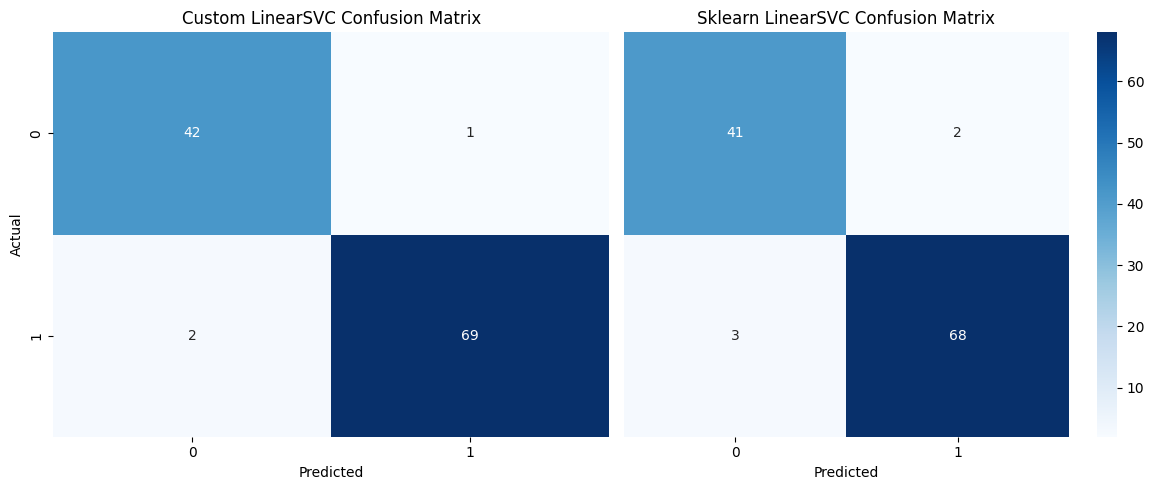

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_confusion_matrix(y_test_bc, y_pred_csvc, ax=ax1, title="Custom LinearSVC Confusion Matrix", cbar=False)
plot_confusion_matrix(y_test_bc, y_pred_svc, ax=ax2, title="Sklearn LinearSVC Confusion Matrix", yvisible=False) 

plt.tight_layout()
plt.show()

### 3.3. Decision Boundary

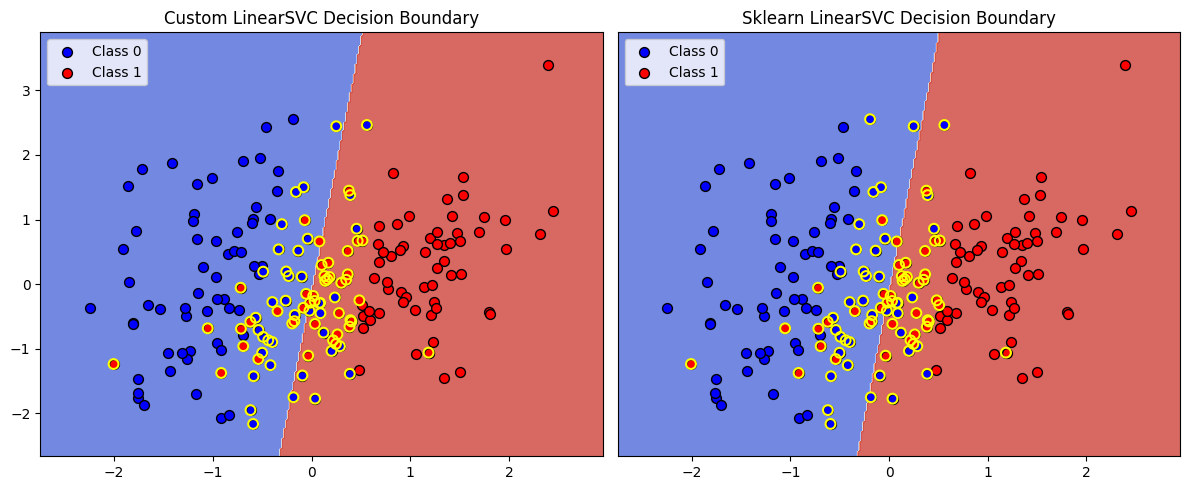

In [7]:
csvc_vis = CustomLinearSVC(C=100, learning_rate=1e-6)
svc_vis = SVC(C=1, kernel='linear')

csvc_vis.fit(X_vis, y_vis)
svc_vis.fit(X_vis, y_vis)

support_vecs_c = X_vis[csvc_vis.get_params['support_indices']]
support_vecs_s = svc_vis.support_vectors_

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

plot_decision_boundary(csvc_vis, X_vis, y_vis, ax1, title="Custom LinearSVC Decision Boundary", s=50)
plot_decision_boundary(svc_vis, X_vis, y_vis, ax2, title="Sklearn LinearSVC Decision Boundary", yvisible=False, s=50)

ax1.scatter(*support_vecs_c.T,
            facecolors='none',
            edgecolors='yellow',
            linewidths=1.5,
            s=50)

ax2.scatter(*support_vecs_s.T,
            facecolors='none',
            edgecolors='yellow',
            linewidths=1.5,
            s=50)

plt.tight_layout()
plt.show()

## 4. Cross-Validation

In [8]:
print("Custom LinearSVC Cross-Validation Scores")
display(cross_validate(CustomLinearSVC, X_bc, y_bc, cv=5, verbose=False))
print("Sklearn LinearSVC Cross-Validation Scores")
display(cross_validate(LinearSVC, X_bc, y_bc, cv=5, verbose=False))

Custom LinearSVC Cross-Validation Scores


,accuracy,precision,recall,f1
0,0.947275,0.953269,0.964141,0.958608


Sklearn LinearSVC Cross-Validation Scores


,accuracy,precision,recall,f1
0,0.964788,0.971381,0.971765,0.971479
